<a href="https://colab.research.google.com/github/MeronaRomany/Advanced-UI/blob/main/Cats__and__Dogs__Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import joblib
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk


os.makedirs('dataset/cats', exist_ok=True)
os.makedirs('dataset/dogs', exist_ok=True)




X = []
y = []

def load_images_from_folder(folder, label):
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)  # نقرأ الصورة ملونة
        if img is not None:
            img = cv2.resize(img, (100, 100))
            img = img / 255.0  # تطبيع القيم
            X.append(img.flatten())
            y.append(label)
        else:
            print(f"تعذر قراءة صورة: {filename}")

print("جارٍ تحميل الصور...")
load_images_from_folder('dataset/cats', 0)  # 0 للقطط
load_images_from_folder('dataset/dogs', 1)  # 1 للكلاب

X = np.array(X)
y = np.array(y)

print(f"✅ عدد الصور المقروءة: {len(X)}")


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = SVC(kernel='linear')
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
print(f"✅ دقة الموديل: {accuracy*100:.2f}%")

joblib.dump(model, 'svm_model.pkl')
print("✅ تم حفظ الموديل بنجاح")


# حفظ الموديل
model = joblib.load('svm_model.pkl')




# 5. واجهة المستخدم


جارٍ تحميل الصور...
تعذر قراءة صورة: 140.jpg
تعذر قراءة صورة: 850.jpg
تعذر قراءة صورة: 11849.jpg
تعذر قراءة صورة: 10747.jpg
تعذر قراءة صورة: 11410.jpg
تعذر قراءة صورة: 2877.jpg
تعذر قراءة صورة: 3136.jpg
تعذر قراءة صورة: 2688.jpg
تعذر قراءة صورة: .ipynb_checkpoints
تعذر قراءة صورة: 11675.jpg
تعذر قراءة صورة: 1308.jpg
تعذر قراءة صورة: 10797.jpg
تعذر قراءة صورة: 11853.jpg
✅ عدد الصور المقروءة: 5545
✅ دقة الموديل: 54.64%
✅ تم حفظ الموديل بنجاح


Saving 182.jpg to 182.jpg
تم تحميل الصورة: 182.jpg
التوقع: dog


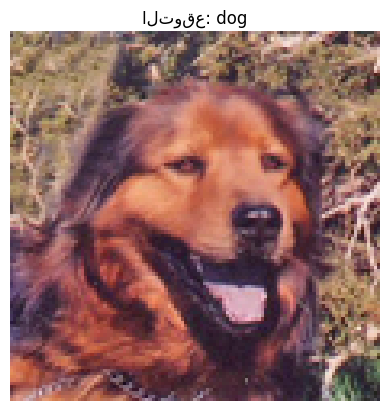

In [ ]:

from google.colab import files
def predict_image(file_path):
    img = cv2.imread(file_path)
    if img is None:
        print("تعذر فتح الصورة!")
        return

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # تحويل لـ RGB علشان العرض
    img_resized = cv2.resize(img_rgb, (100, 100))
    img_flatten = img_resized / 255.0
    img_flatten = img_flatten.flatten().reshape(1, -1)

    # التوقع
    prediction = model.predict(img_flatten)[0]
    label = 'cat' if prediction == 0 else 'dog'

    # عرض النتيجة والصورة
    print(f"التوقع: {label}")
    plt.imshow(img_rgb)
    plt.title(f"التوقع: {label}")
    plt.axis('off')
    plt.show()

def choose_image_with_mouse():
    uploaded = files.upload()  # تحميل الصورة من جهازك

    for file_name in uploaded.keys():
        print(f"تم تحميل الصورة: {file_name}")
        predict_image(file_name)  # استدعاء التوقع بناءً على الصورة المختارة

# اختبار اختيار الصورة باستخدام الماوس
choose_image_with_mouse()